# DB Benchmarking Operation

Final Project Database Technology Lecture

Deren Tanaphan (22/503261/TK/54976)

https://github.com/Lev1reG/REST-API-GDB

## Data Preparation

Import libraries

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [145]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
# Display all rows
pd.reset_option('display.max_rows')

Define csv files path. This csv file contain execution time in ms

In [147]:
getAllBook_path = '/content/drive/MyDrive/Final Project TBD/Execution Time GRB - getAllBook.csv'
getBookByKeyword_path = '/content/drive/MyDrive/Final Project TBD/Execution Time GRB - getBookByKeyword.csv'
addBook_path = '/content/drive/MyDrive/Final Project TBD/Execution Time GRB - addBook.csv'
getAllReview_path = '/content/drive/MyDrive/Final Project TBD/Execution Time GRB - getAllReview.csv'
getReviewByTitle_path = '/content/drive/MyDrive/Final Project TBD/Execution Time GRB - getReviewByTitle.csv'
addReview_path = '/content/drive/MyDrive/Final Project TBD/Execution Time GRB - addReview.csv'
updateBookAuthor_path = '/content/drive/MyDrive/Final Project TBD/Execution Time GRB - updateBookAuthor.csv'

In [148]:
getAllBook = pd.read_csv(getAllBook_path)
getBookByKeyword = pd.read_csv(getBookByKeyword_path)
addBook = pd.read_csv(addBook_path)
getAllReview = pd.read_csv(getAllReview_path)
getReviewByTitle = pd.read_csv(getReviewByTitle_path)
addReview = pd.read_csv(addReview_path)
updateBookAuthor = pd.read_csv(updateBookAuthor_path)

In [149]:
getAllBook.dtypes

Test Number      int64
CMD             object
PgAdmin          int64
Postman(API)     int64
dtype: object

Because the column `CMD` data type is not float, we need to convert it.

In [150]:
def convert_columns(data):
  data['CMD'] = data['CMD'].str.replace(',', '.')
  data['CMD'] = data['CMD'].astype(float)

In [151]:
convert_columns(getAllBook)
convert_columns(getBookByKeyword)
convert_columns(addBook)
convert_columns(getAllReview)
convert_columns(getReviewByTitle)
convert_columns(addReview)
convert_columns(updateBookAuthor)

In [152]:
getAllBook.dtypes

Test Number       int64
CMD             float64
PgAdmin           int64
Postman(API)      int64
dtype: object

Now, the data is ready to be manipulated and visualized

## Define Helpers Function

In [153]:
def calculate_statistics(data):
  controllers = data.columns[1:]
  summary = data[controllers].agg(['mean', 'std']).T
  summary.columns = ['Avg Execution Time (ms)', 'Std Dev (ms)']

  return summary

In [154]:
def plot(data):
  cmd_times = data['CMD']
  pgadmin_times = data['PgAdmin']
  postman_times = data['Postman(API)']

  # Number of measurements (assuming all columns have the same length)
  num_measurements = len(data)

  # Plotting the data
  plt.figure(figsize=(10, 6))

  # Example of plotting bar charts for CMD, PgAdmin, and Postman/API
  bar_width = 0.25
  index = range(1, num_measurements + 1)  # Adjust index to start from 1

  plt.bar(index, cmd_times, width=bar_width, label='CMD', align='center')
  plt.bar([i + bar_width for i in index], pgadmin_times, width=bar_width, label='PgAdmin', align='center')
  plt.bar([i + 2 * bar_width for i in index], postman_times, width=bar_width, label='Postman(API)', align='center')

  # Add labels and title
  plt.xlabel('Measurements')
  plt.ylabel('Execution Time (ms)')
  plt.title('Comparison of SQL Execution Times')
  plt.xticks([i + bar_width for i in index], index)  # Use adjusted index as xticks
  plt.legend()

  # Show plot
  plt.tight_layout()
  plt.show()

## Get All Book (DQL)

### Table

In [186]:
print(getAllBook)

    Test Number    CMD  PgAdmin  Postman(API)
0             1  1.039       48            50
1             2  1.580       58            31
2             3  1.310       54            11
3             4  0.715       52             7
4             5  1.425       52             8
5             6  0.674       38             7
6             7  1.182       49             6
7             8  0.684       57             8
8             9  1.300       39             9
9            10  0.746       41             6
10           11  0.764       36             6
11           12  0.955       58             6
12           13  1.504       38             7
13           14  1.205       41             7
14           15  1.408       38             6
15           16  0.805       47             6
16           17  1.008       36             6
17           18  1.191       46             7
18           19  0.943       40             5
19           20  0.677       39             5
20           21  0.906       39   

### Statistical Description

In [176]:
summary = calculate_statistics(getAllBook)

print(summary)

              Avg Execution Time (ms)  Std Dev (ms)
CMD                          1.018933      0.272282
PgAdmin                     43.833333      7.469863
Postman(API)                 8.733333      9.077951


### Comparison Charts

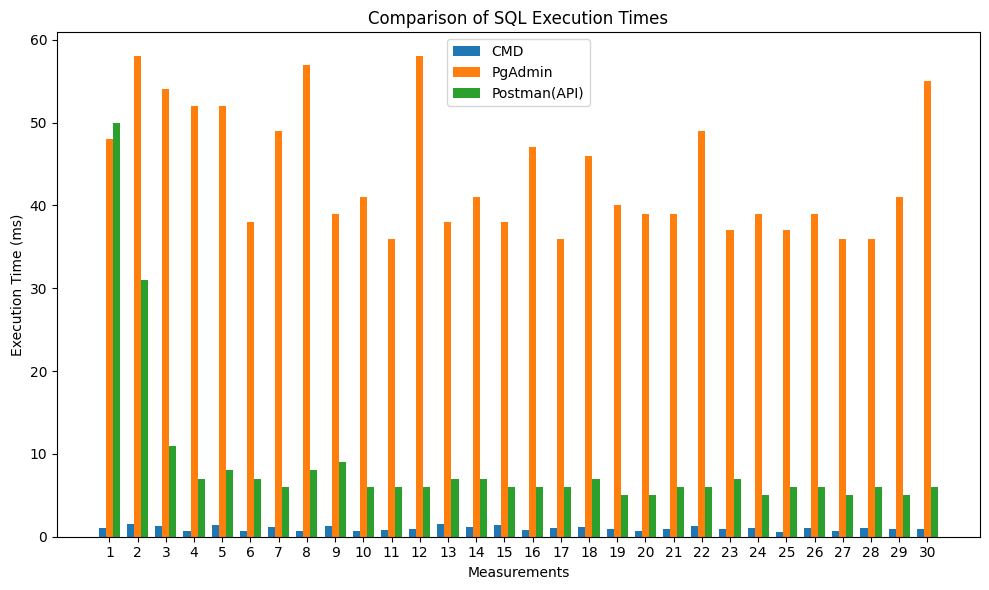

In [157]:
plot(getAllBook)

## Get Book by Keyword (DQL)

### Table

In [185]:
print(getBookByKeyword)

    Test Number    CMD  PgAdmin  Postman(API)
0             1  0.641       89            52
1             2  1.317       63             8
2             3  0.963       80             8
3             4  1.326       58             6
4             5  0.699       68             6
5             6  1.055       76            16
6             7  1.214       96             8
7             8  0.755       91             6
8             9  0.749       62             8
9            10  0.630       77             7
10           11  0.587      133             6
11           12  0.649       59             6
12           13  0.754       67             7
13           14  1.071       57             5
14           15  1.093       62             8
15           16  1.051      105            16
16           17  1.683       61             7
17           18  1.360       61             5
18           19  1.225       68             6
19           20  0.481       64             6
20           21  1.271       62   

### Statistical Description

In [159]:
summary = calculate_statistics(getBookByKeyword)

print(summary)

              Avg Execution Time (ms)  Std Dev (ms)
CMD                          1.010933      0.294744
PgAdmin                     76.866667     21.674287
Postman(API)                 8.900000      8.734987


### Comparison Charts

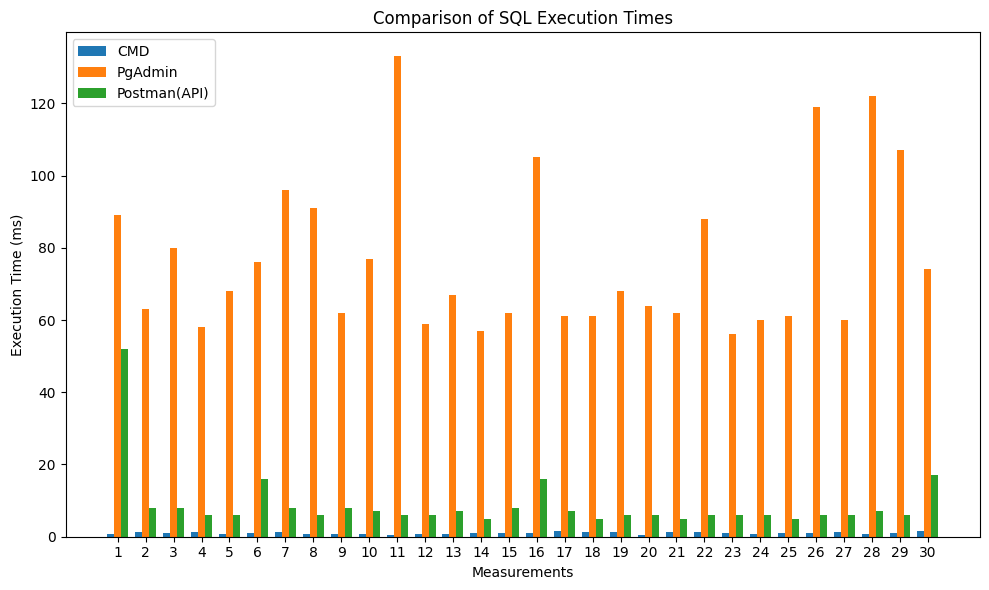

In [160]:
plot(getBookByKeyword)

## Add Book (DML)

### Table

In [184]:
print(addBook)

    Test Number     CMD  PgAdmin  Postman(API)
0             1  30.100       49            28
1             2  32.470       48            35
2             3   8.438       50            10
3             4   4.224       94            14
4             5   7.878       65            13
5             6   8.224       92            16
6             7   8.305       82            12
7             8   3.885       63            10
8             9   7.835       78            16
9            10  32.996       73            14
10           11   7.636       47            13
11           12   8.617       47             8
12           13   7.669       65            19
13           14   8.363       48            22
14           15   7.801       92            14
15           16   7.994       60            25
16           17  32.839       47            13
17           18  32.803       53            15
18           19   8.036       47            10
19           20   7.853       50            16
20           

### Statistical Description

In [183]:
summary = calculate_statistics(addBook)

print(summary)

              Avg Execution Time (ms)  Std Dev (ms)
CMD                         14.163400     11.286535
PgAdmin                     65.600000     17.440737
Postman(API)                14.366667      6.493941


### Comparison Charts

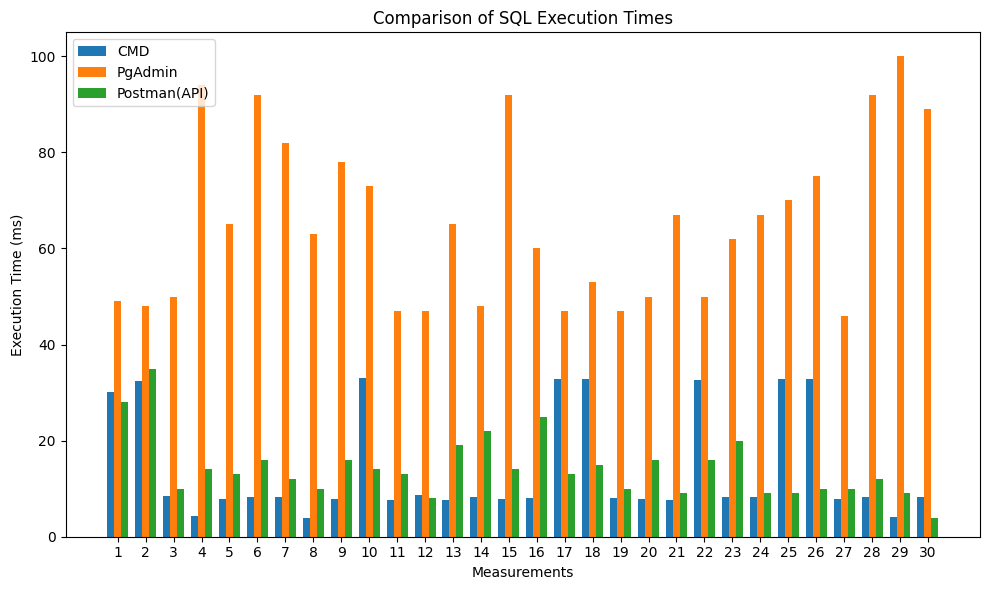

In [163]:
plot(addBook)

## Get All Review (DQL)

### Table

In [182]:
print(getAllReview)

    Test Number    CMD  PgAdmin  Postman(API)
0             1  2.276       65            23
1             2  0.933       66            20
2             3  0.936       98            11
3             4  1.146       81            10
4             5  1.009       59             6
5             6  0.985       59             7
6             7  1.417       58             8
7             8  1.039       87             7
8             9  0.905       63            11
9            10  0.884       75             6
10           11  0.968       59             6
11           12  0.992       63             6
12           13  0.755       61             6
13           14  0.874       59             7
14           15  1.076       60             7
15           16  1.030       65             6
16           17  1.048       55             8
17           18  1.037       93            11
18           19  1.102      116             6
19           20  0.978       65             8
20           21  1.016       77   

### Statistical Description

In [165]:
summary = calculate_statistics(getAllReview)

print(summary)

              Avg Execution Time (ms)  Std Dev (ms)
CMD                          1.070767      0.290504
PgAdmin                     69.100000     14.360746
Postman(API)                 8.166667      4.418483


### Comparison Charts

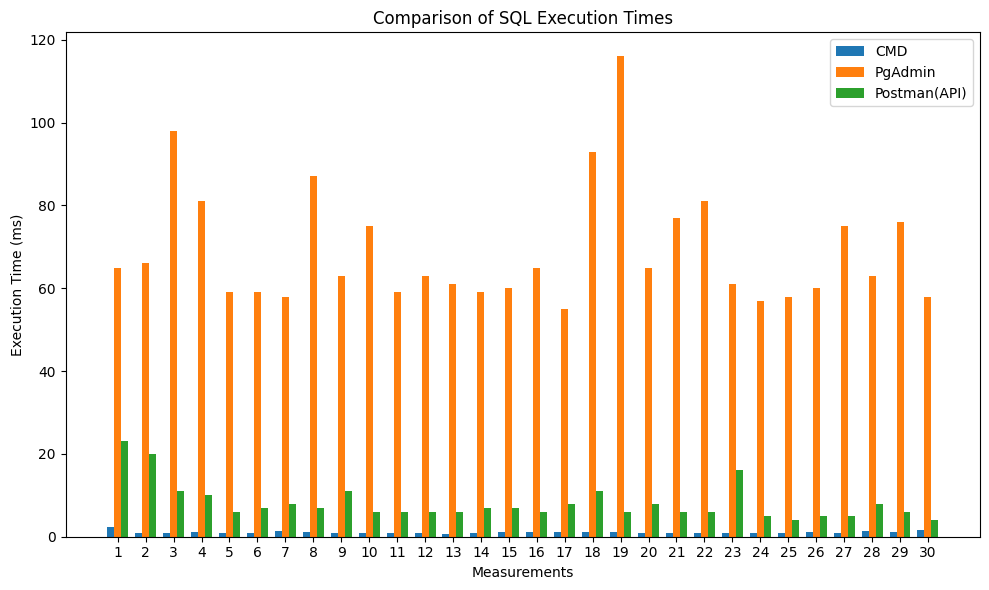

In [166]:
plot(getAllReview)

## Get Review By Title (DQL)

### Table

In [179]:
print(getReviewByTitle)

    Test Number    CMD  PgAdmin  Postman(API)
0             1  1.375       65            53
1             2  1.269       62             9
2             3  1.010       62             6
3             4  1.249       87             7
4             5  1.347       58             5
5             6  1.321       67             8
6             7  1.403       76             5
7             8  1.092       93             5
8             9  2.097       57             6
9            10  1.324       58             6
10           11  1.095       57             6
11           12  1.166       63             5
12           13  1.580       76             6
13           14  1.212       68             7
14           15  1.258       60             6
15           16  1.506       59             6
16           17  1.151       76             7
17           18  1.249       96             5
18           19  1.111       60             8
19           20  1.190       76             6
20           21  1.385      114   

### Statistical Description

In [168]:
summary = calculate_statistics(getReviewByTitle)

print(summary)

              Avg Execution Time (ms)  Std Dev (ms)
CMD                          1.280333      0.200423
PgAdmin                     72.000000     17.106159
Postman(API)                 8.100000      8.655674


### Comparison Charts

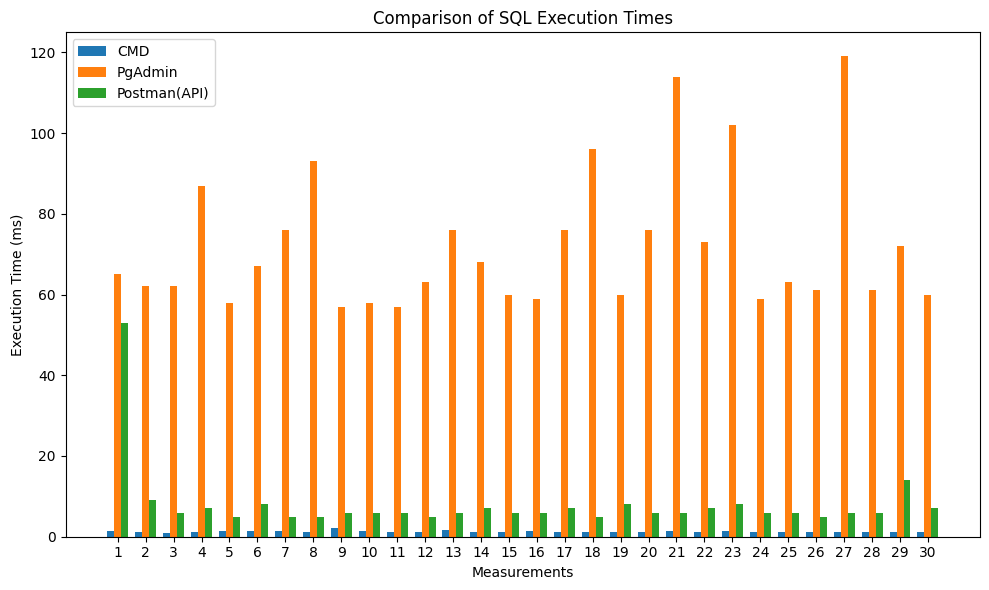

In [169]:
plot(getReviewByTitle)

## Add Review (DML)

### Table

In [180]:
print(addReview)

    Test Number     CMD  PgAdmin  Postman(API)
0             1   9.324       57            79
1             2   6.401       40            33
2             3   6.350       40            22
3             4  30.832       41            19
4             5  30.066       45            20
5             6   6.407       38            16
6             7   6.396       38            17
7             8   6.356       43             9
8             9  30.819       41            15
9            10   6.471       46            18
10           11   6.716       46            16
11           12  30.296       43            31
12           13   6.680       40            17
13           14   6.361       39            31
14           15   6.357       39            17
15           16   6.666       44             9
16           17  31.022       54            22
17           18  30.548       41            13
18           19   6.556       39            16
19           20   6.421       39            13
20           

### Statistical Description

In [171]:
summary = calculate_statistics(addReview)

print(summary)

              Avg Execution Time (ms)  Std Dev (ms)
CMD                         12.940833     10.825851
PgAdmin                     45.033333      9.604178
Postman(API)                20.400000     12.571451


### Comparison Charts

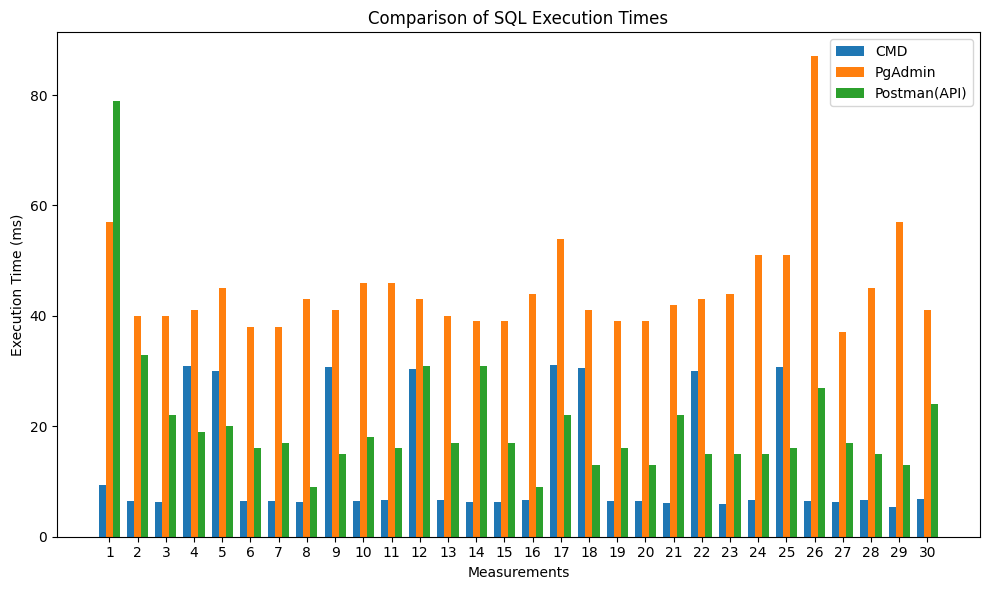

In [172]:
plot(addReview)

## Update Book Author (DML)

### Table

In [181]:
print(updateBookAuthor)

    Test Number    CMD  PgAdmin  Postman(API)
0             1  2.595       65            37
1             2  6.244       66            23
2             3  6.136       54            35
3             4  4.513       46            30
4             5  6.263       53            27
5             6  6.478       59            26
6             7  5.973       49            24
7             8  5.926       50            28
8             9  5.922       56            31
9            10  5.952       73            33
10           11  6.192       50            91
11           12  6.079       50            42
12           13  6.204       49            37
13           14  6.199       75            36
14           15  6.087       51            25
15           16  6.073       48            22
16           17  6.152       54            34
17           18  6.113       51            47
18           19  6.108       52            25
19           20  6.162       51            31
20           21  6.184       51   

### Statistical Description

In [178]:
summary = calculate_statistics(updateBookAuthor)

print(summary)

              Avg Execution Time (ms)  Std Dev (ms)
CMD                          5.800667      1.090280
PgAdmin                     54.833333      7.786298
Postman(API)                34.233333     14.620919


### Comparison Charts

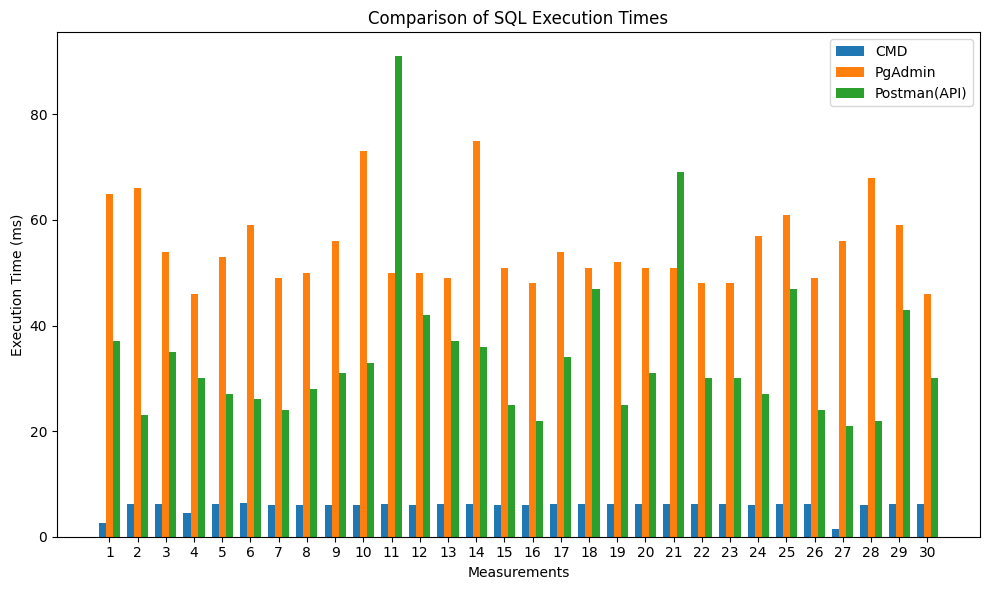

In [175]:
plot(updateBookAuthor)

## Conclusion

From the statistical description & comparison charts, we get some insight. In my case, **PgAdmin** is always the slower than the other. If we compare **PgAdmin** to **CMD** & **PostMan**, **PgAdmin** is far more slower than the other. **CMD** & **PostMan** have a narrow margin. But, **CMD** is little more faster than **PostMan**. In case of DML, sometimes **PostMan** execution times catched up with **CMD** especially in type of DML query.

There are several factors could contribute to this observation. **PgAdmin**, as a graphical user interface (GUI) tool, introduces additional layers of abstraction and interface rendering overhead compared to the more streamlined execution path of **CMD** and the structured request handling of **Postman**'s API calls.

The reason why **CMD** is the fastest because CMD typically connects directly to the PostgreSQL database instance, especially if both CMD and the database are running on the same machine or on a local network. This direct connection minimizes network latency, resulting in faster data transfer and query execution times. Also, CMD typically does not involve additional middleware or graphical user interface components that could introduce overhead. It directly sends SQL commands to the database server and receives results, minimizing processing delays.

The reason why **PostMan** is a little bit slower than **CMD** because API calls involve network communication overhead. The time taken includes not only the SQL query execution time but also the time to serialize data, send it over the network, and deserialize the response. Data sent and received via APIs are typically serialized (e.g., JSON) before transmission and deserialized upon receipt. This serialization/deserialization process adds extra time overhead compared to direct database interactions.